In [1]:
## Defining functions to calculate the thermal properties for Phenolic-Coal Crosslinking Project

# The aim of this script is to define the functions for calculating the heat of reaction and rate constants for the simulation model:
# The functions will be called in the main script
# The functions will be defined in the following order:
        # 1. Heat of Reaction - Heat of Reaction for the phenolic-phenolic and phenolic-coal reactions
        # 2. Rate Constants - Rate constants for the phenolic-phenolic (ortho/para) and phenolic-coal reactions

# Certain assumptions are made in the calculation of the heat of reaction and rate constants:
        # 1. The heat of reaction is taken to be dependent on the number of mols of phenolic and coal in the system which 
        # 2. The rate constants are taken to be dependent on the number of mols of phenolic and coal in the system
        # 3. The activation energies and pre-exponential factors are taken to be constants

# the '@interact' tool was used to analyse the dependency of the heat of reaction on the number of mols of phenolic and coal in the system

In [2]:
# conda install -c conda-forge ipywidgets
# # pip install ipywidgets

from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
try:
    import seaborn as sbn
except (ModuleNotFoundError, ImportError):
    print("No seaborn")
    sbn = None
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
if sbn:
    sbn.set_context("talk", font_scale=1)

In [3]:
## Calculating the molecular weight of coal based on elemental analysis

'''
Carbon (C):
   - Atomic mass of carbon (C): 12.01 g/mol
   - Moles of carbon = (68.23% / 100) / 12.01 g/mol = 0.05698 mol

Hydrogen (H):
   - Atomic mass of hydrogen (H): 1.008 g/mol
   - Moles of hydrogen = (4.37% / 100) / 1.008 g/mol = 0.04345 mol

Nitrogen (N):
   - Atomic mass of nitrogen (N): 14.01 g/mol
   - Moles of nitrogen = (0.96% / 100) / 14.01 g/mol = 0.0000685 mol

Oxygen (O):
   - Atomic mass of oxygen (O): 16.00 g/mol
   - Moles of oxygen = (17.80% / 100) / 16.00 g/mol = 0.11125 mol

Now, calculate the molar ratio:
C:H:N:O = 0.05698 : 0.04345 : 0.0000685 : 0.11125

Determine the smallest ratio (which corresponds to nitrogen) and normalize the ratios:
C:H:N:O = 1 : 0.7626 : 0.001201 : 1.948

The molecular weight (approximate) is then calculated as:
Molecular Weight = 1 * 12.01 + 0.7626 * 1.008 + 0.001201 * 14.01 + 1.948 * 16.00 =32.61 g/mol

'''

## The molecular weight of novolak phenolic resin
molar_mass_novolac_phenol = 600 # g/mol

In [6]:
## Heat of reaction for the total crosslinking reaction for the different rxns -- Experimental data

# 100% phenolic curing reaction
Hrxn_total_100p = 31620 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
Na = 6.022e23 # Avogadro's number 

# Hrxn for a set of phenol-phenol (Hrxn_pp) -- Hrxn_total/Na (J/ph_mol)
Hrxn_pp = Hrxn_total_100p/Na # J/ph_mol
print("Hrxn per phenol-phenol reaction = ", Hrxn_pp)

# Sum of total H_rxn for all phenol-phenol reactions (Hrxn_total_pp)
# Hrxn_total_pp = Hrxn_pp * Na (J/mol)

# Based on the number of phenol molecules in each reaction the heat of reaction for each reaction can be calculated
# n_phenol = mass_phenol/molar_mass_novolac_phenol
mass_phenol = 0.008 # g
molar_mass_novolac_phenol = 600 # g/mol
n_molphen = mass_phenol/molar_mass_novolac_phenol # mol
print("n_molphen = ", n_molphen)

# How many phenol molecules per n_molphen of novolac phenol?
# n_phenol = n_molphen * Avogadro's number
n_phenol = n_molphen * Na # mol
print("n_phenol = ", n_phenol)

# The total Heat of reaction (phenol-phenol links) from simulation 
Hrxn_total_pp = Hrxn_pp * n_phenol # J/mol
print("Hrxn_total_pp = ", Hrxn_total_pp)

# Check with the experimental data
# Hrxn_total_exp_pp = 31620 # J/mol
Hrxn_total_exp_pp = Hrxn_total_100p * n_molphen
print("Hrxn_total_exp_pp = ", Hrxn_total_exp_pp)


'''
This code calculates the heat of reaction for simulation of phenol-phenol crosslinking reaction
This calculation is based on certain assumptions from the experimental data

Assumptions:
    1. The total heat of reaction for the phenol-phenol crosslinking reaction is the same as the total heat of reaction for the 100% phenolic curing reaction
    2. Hence we can divide the total heat of reaction by the Avogadros number (Na), to get the heat of reaction for each phenol-phenol atomic reaction
    3. The heat of reaction for each phenol-phenol atomic reaction is the same
    4. The total heat of reaction in the simulation is estimated by the total number of phenol-phenol crosslinks that are formed.

The final calculated total heat of reaction (Hrxn) is estimated in Joules (J)

'''

# 60% phenolic - 40% coal curing reaction
Hrxn_total_60p = 23406 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
Na = 6.022e23 # Avogadro's number 

# Hrxn for a set of phenol-coal (Hrxn_pc) -- Hrxn_total_60p/Na (J/ph_mol)
Hrxn_pc = Hrxn_total_60p/Na # J/ph_mol
print("Hrxn per phenol-coal reaction = ", Hrxn_pc)

# Sum of total H_rxn for all phenol-coal reactions (Hrxn_total_pc)
# Hrxn_total_pc = Hrxn_pc * Na (J/mol)

# How many coal molecules per n_molcoal ?
# n_coal = n_molcoal * Avogadro's number
n_molcoal = 0.0005 # mol
n_coal = n_molcoal * Na # mol
print("n_coal = ", n_coal)

# The total Heat of reaction (phenol-coal links) from simulation 
Hrxn_total_pc = Hrxn_pc * n_coal # J/mol
print("Hrxn_total_pc = ", Hrxn_total_pc)

# Check with the experimental data
# Hrxn_total_exp_pc = 31620 # J/mol
Hrxn_total_exp_pc = Hrxn_total_60p * n_molcoal
print("Hrxn_total_exp_pc = ", Hrxn_total_exp_pc)


Hrxn per phenol-phenol reaction =  5.250747260046496e-20
n_molphen =  1.3333333333333333e-05
n_phenol =  8.029333333333334e+18
Hrxn_total_pp =  0.42160000000000003
Hrxn_total_exp_pp =  0.4216
Hrxn per phenol-coal reaction =  3.886748588508801e-20
n_coal =  3.011e+20
Hrxn_total_pc =  11.703
Hrxn_total_exp_pc =  11.703


In [8]:
## Heat of reaction for the total crosslinking reaction for the different rxns -- Experimental data

# 100% phenolic curing reaction
Hrxn_total_100p = 31620 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
Na = 6.022e23 # Avogadro's number 

# Hrxn for a set of phenol-phenol (Hrxn_pp) -- Hrxn_total/Na (J/ph_mol)
Hrxn_pp = Hrxn_total_100p/Na # J/ph_mol
print("Hrxn per phenol-phenol reaction = ", Hrxn_pp)

# Sum of total H_rxn for all phenol-phenol reactions (Hrxn_total_pp)
# Hrxn_total_pp = Hrxn_pp * Na (J/mol)

# Based on the number of phenol molecules in each reaction the heat of reaction for each reaction can be calculated
# n_phenol = mass_phenol/molar_mass_novolac_phenol
mass_phenol = 0.008 # g
molar_mass_novolac_phenol = 600 # g/mol
n_molphen = mass_phenol/molar_mass_novolac_phenol # mol
print("n_molphen = ", n_molphen)

# How many phenol molecules per n_molphen of novolac phenol?
# n_phenol = n_molphen * Avogadro's number
n_phenol = 20 * Na # mol
print("n_phenol = ", n_phenol)

# The total Heat of reaction (phenol-phenol links) from simulation 
Hrxn_total_pp = Hrxn_pp * n_phenol # J/mol
print("Hrxn_total_pp = ", Hrxn_total_pp)

def Hrxn_pp(n_phenol):
    Na = 6.022e23 # Avogadro's number
    Hrxn_total_100p = 31620 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
    Hrxn_pp = Hrxn_total_100p/Na # J/ph_mol
    n_phenol = 20 * Na
    return Hrxn_pp * n_phenol

Hrxn per phenol-phenol reaction =  5.250747260046496e-20
n_molphen =  1.3333333333333333e-05
n_phenol =  1.2044e+25
Hrxn_total_pp =  632400.0


Results based on the crosslinking of the total phenolic resins present in the system:
n_molphen = 0.00 mols, Hrxn_total_exp_pp = 0.42 J, Hrxn_total_pp = 0.42 J
n_molphen = 50.00 mols, Hrxn_total_exp_pp = 1581000.00 J, Hrxn_total_pp = 1581000.00 J
n_molphen = 100.00 mols, Hrxn_total_exp_pp = 3162000.00 J, Hrxn_total_pp = 3162000.00 J
n_molphen = 150.00 mols, Hrxn_total_exp_pp = 4743000.00 J, Hrxn_total_pp = 4743000.00 J
n_molphen = 200.00 mols, Hrxn_total_exp_pp = 6324000.00 J, Hrxn_total_pp = 6324000.00 J
n_molphen = 250.00 mols, Hrxn_total_exp_pp = 7905000.00 J, Hrxn_total_pp = 7905000.00 J
n_molphen = 300.00 mols, Hrxn_total_exp_pp = 9486000.00 J, Hrxn_total_pp = 9486000.00 J

Results based on the actual number of phenol-phenol crosslinks formed in the simulation:
n_molphen_sim = 0.00 mols, Hrxn_total_exp_pp = 0.42 J, Hrxn_total_pp = 0.42 J
n_molphen_sim = 30.00 mols, Hrxn_total_exp_pp = 948600.00 J, Hrxn_total_pp = 948600.00 J
n_molphen_sim = 80.00 mols, Hrxn_total_exp_pp = 2529600.

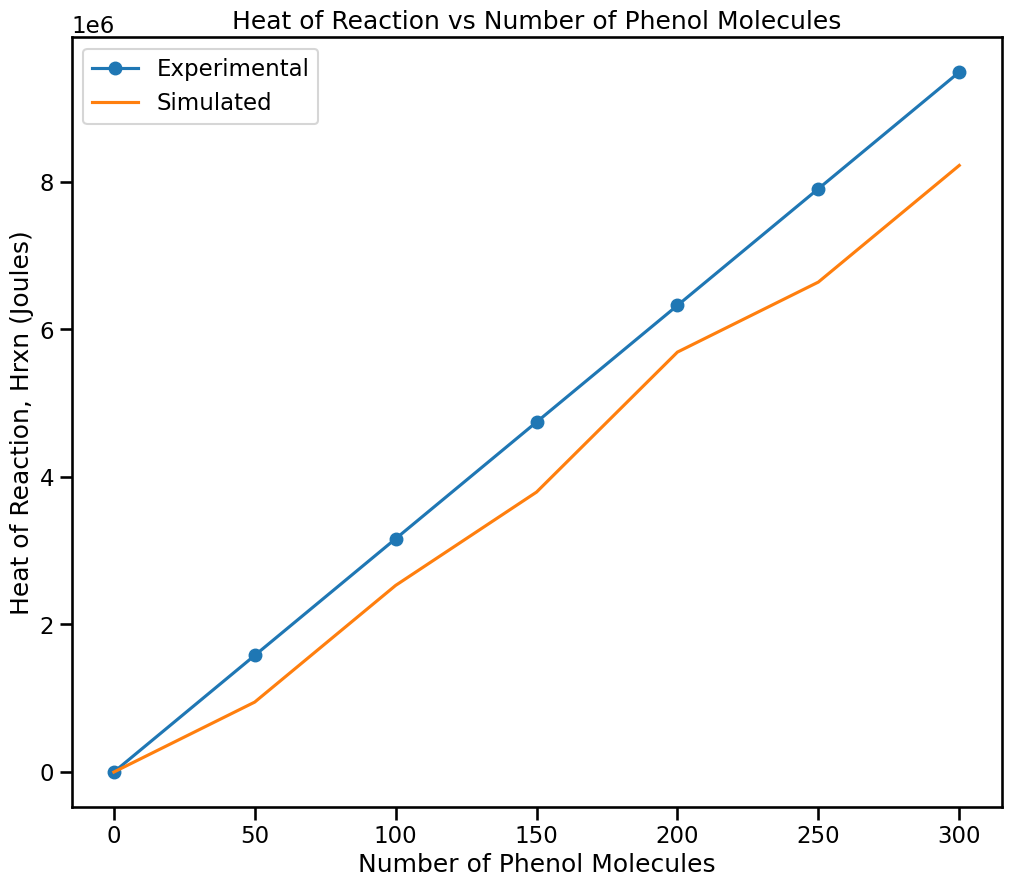

In [10]:
# Wrapping up the calculation of the heat of reaction for pure phenolic resin into a function and testing out the function with dummy simulated data

def calc_Hrxn_pp(n_molphen_values):
    # Constants
    Hrxn_total_100p = 31620  # Total Heat of reaction (100% phenolic) J/mol (from DSC)
    Na = 6.022e23  # Avogadro's number

    results = []

    for n_molphen in n_molphen_values:
        # Calculate Hrxn for a phenol-phenol reaction (Hrxn_pp)
        Hrxn_pp = Hrxn_total_100p / Na  # J/ph_mol

        # Calculate the total number of phenol molecules (n_phenol)
        n_phenol = n_molphen * Na  # mol

        # Calculate the total Heat of reaction for all phenol-phenol reactions
        Hrxn_total_pp = Hrxn_pp * n_phenol  # J/mol

        # Check with experimental data
        Hrxn_total_exp_pp = Hrxn_total_100p * n_molphen

        results.append((n_molphen, Hrxn_total_exp_pp, Hrxn_total_pp))

    return results


# Example usage
n_molphen_values = [1.33e-5, 50, 100, 150, 200, 250, 300]   #   # This is the total number of phenolic resins present in the system
n_molphen_simulated_links = [1.33e-5, 30, 80, 120, 180, 210, 260]   # This is the actual number of phenol-phenol links formed during the simulation - a dummy data set
experimental_results = calc_Hrxn_pp(n_molphen_values)  # This is the expected total Hrxn values based on experimental data
simulated_results = calc_Hrxn_pp(n_molphen_simulated_links) # This is the calculated total Hrxn based on simulated crosslinks

# Print the experimental results
print("Results based on the crosslinking of the total phenolic resins present in the system:")
for n_molphen, Hrxn_total_exp_pp, Hrxn_total_pp in experimental_results:
    print(f"n_molphen = {n_molphen:.2f} mols, Hrxn_total_exp_pp = {Hrxn_total_exp_pp:.2f} J, Hrxn_total_pp = {Hrxn_total_pp:.2f} J")

# Print the simulated results
print("\nResults based on the actual number of phenol-phenol crosslinks formed in the simulation:")
for result in simulated_results:
    n_molphen_sim, Hrxn_total_exp_pp, Hrxn_total_pp = result
    print(f"n_molphen_sim = {n_molphen_sim:.2f} mols, Hrxn_total_exp_pp = {Hrxn_total_exp_pp:.2f} J, Hrxn_total_pp = {Hrxn_total_pp:.2f} J")

# Plotting the Results - Experimental vs Simulated crosslinks
simulated_results = np.array(simulated_results)
experimental_results = np.array(experimental_results)

# Extracting the experimental results
n_molphen_values_exp = experimental_results[:,0]
Hrxn_total_exp_values = experimental_results[:,1]

# Extracting the simulated results
n_molphen_values_sim = simulated_results[:,0]
Hrxn_total_pp_values = simulated_results[:,2]

# Plotting the results
plt.plot(n_molphen_values_exp, Hrxn_total_exp_values, label='Experimental', marker='o')
plt.plot(n_molphen_values_exp, Hrxn_total_pp_values, label='Simulated')

# Add labels and title
plt.xlabel('Number of Phenol Molecules')
plt.ylabel('Heat of Reaction, Hrxn (Joules)')
plt.title('Heat of Reaction vs Number of Phenol Molecules')
plt.legend()
plt.show()

In [9]:
# An interactive slider that allows you to change the number of phenol molecules and see the effect on the heat of reaction

@interact
def calculate_Hrxn_pp(n_molphen = 120):
    # Constants
    Hrxn_total_100p = 31620  # Total Heat of reaction (100% phenolic) J/mol (from DSC)
    Na = 6.022e23  # Avogadro's number

    # Calculate Hrxn for a phenol-phenol reaction (Hrxn_pp)
    Hrxn_pp = Hrxn_total_100p / Na  # J/ph_mol

    # Calculate the total number of phenol molecules (n_phenol)
    n_phenol = n_molphen * Na  # mol

    # Calculate the total Heat of reaction for all phenol-phenol reactions
    Hrxn_total_pp = Hrxn_pp * n_phenol  # J/mol

    # Check with experimental data
    Hrxn_total_exp_pp = (Hrxn_total_100p * n_molphen)/1000 # kJ/mol

    # results.append((n_molphen, Hrxn_total_exp_pp, Hrxn_total_pp))

    return Hrxn_total_exp_pp

interactive(children=(IntSlider(value=120, description='n_molphen', max=360, min=-120), Output()), _dom_classe…

Results based on the crosslinking of the total phenolic-coal resins present in the system:
n_molcoal = 0.00 mols, Hrxn_total_exp_pc = 0.21 J, Hrxn_total_pc = 0.21 J
n_molcoal = 33.33 mols, Hrxn_total_exp_pc = 780200.00 J, Hrxn_total_pc = 780200.00 J
n_molcoal = 66.67 mols, Hrxn_total_exp_pc = 1560400.00 J, Hrxn_total_pc = 1560400.00 J
n_molcoal = 100.00 mols, Hrxn_total_exp_pc = 2340600.00 J, Hrxn_total_pc = 2340600.00 J
n_molcoal = 133.33 mols, Hrxn_total_exp_pc = 3120800.00 J, Hrxn_total_pc = 3120800.00 J
n_molcoal = 166.67 mols, Hrxn_total_exp_pc = 3901000.00 J, Hrxn_total_pc = 3901000.00 J
n_molcoal = 200.00 mols, Hrxn_total_exp_pc = 4681200.00 J, Hrxn_total_pc = 4681200.00 J

Results based on the actual number of phenol-coal crosslinks formed in the simulation:
n_molpc_sim = 0.00 mols, Hrxn_total_exp_pc = 0.21 J, Hrxn_total_pc = 0.21 J
n_molpc_sim = 12.00 mols, Hrxn_total_exp_pc = 280872.00 J, Hrxn_total_pc = 280872.00 J
n_molpc_sim = 25.00 mols, Hrxn_total_exp_pc = 585150.00 J, H

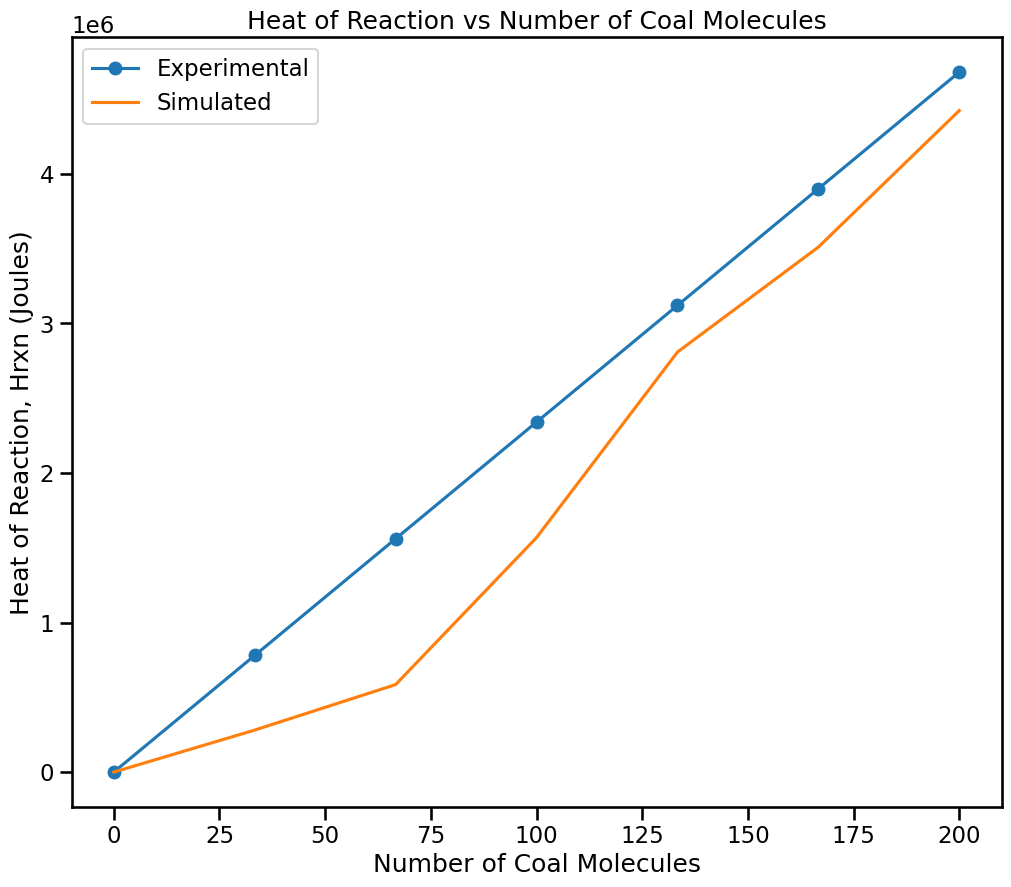

In [12]:
# Wrapping up the calculation of the heat of reaction for the phenolic-coal mix into a function and testing out the function with dummy simulated data

def calculate_Hrxn_pc(n_molcoal_values):
    # Constants
    Hrxn_total_60p = 23406  # Total Heat of reaction (60% phenolic-coal mix) J/mol (from DSC)
    Na = 6.022e23  # Avogadro's number

    results_pc = []

    for n_molcoal in n_molcoal_values:
        # Calculate Hrxn for a phenol-coal reaction (Hrxn_pc)
        Hrxn_pc = Hrxn_total_60p / Na  # J/ph_mol

        # Calculate the total number of coal molecules (n_coal)
        n_coal = n_molcoal * Na  # mol

        # Calculate the total Heat of reaction for all phenol-coal reactions
        Hrxn_total_pc = Hrxn_pc * n_coal  # J/mol

        # Check with experimental data
        Hrxn_total_exp_pc = Hrxn_total_60p * n_molcoal

        results_pc.append((n_molcoal, Hrxn_total_exp_pc, Hrxn_total_pc))

    return results_pc

# Example usage
n_molcoal_values = [(2/3) * phenmol for phenmol in n_molphen_values] #   # This is the total number of coal molecules present in the system 
# n_molcoal_values is based on a 3:2 ratio of phenolic:coal
n_molpc_simulated_links = [8.87e-06, 12, 25, 67, 120, 150, 189]   # This is the actual number of phenol-coal links formed during the simulation - a dummy data set
experimental_results_pc = calculate_Hrxn_pc(n_molcoal_values)  # This is the expected total Hrxn values based on experimental data
simulated_results_pc = calculate_Hrxn_pc(n_molpc_simulated_links) # This is the calculated total Hrxn based on simulated crosslinks

# Print the experimental results_pc
print("Results based on the crosslinking of the total phenolic-coal resins present in the system:")
for n_molcoal, Hrxn_total_exp_pc, Hrxn_total_pc in experimental_results_pc:
    print(f"n_molcoal = {n_molcoal:.2f} mols, Hrxn_total_exp_pc = {Hrxn_total_exp_pc:.2f} J, Hrxn_total_pc = {Hrxn_total_pc:.2f} J")

# Print the simulated results_pc
print("\nResults based on the actual number of phenol-coal crosslinks formed in the simulation:")
for result_pc in simulated_results_pc:
    n_molpc_sim, Hrxn_total_exp_pc, Hrxn_total_pc = result_pc
    print(f"n_molpc_sim = {n_molpc_sim:.2f} mols, Hrxn_total_exp_pc = {Hrxn_total_exp_pc:.2f} J, Hrxn_total_pc = {Hrxn_total_pc:.2f} J")


# Plotting the Results - Experimental vs Simulated crosslinks
simulated_results_pc = np.array(simulated_results_pc)
experimental_results_pc = np.array(experimental_results_pc)

# Extracting the experimental results
n_molpc_values_exp = experimental_results_pc[:,0]
Hrxn_total_exp_pc_values = experimental_results_pc[:,1]

# Extracting the simulated results
n_molpc_values_sim = simulated_results_pc[:,0]
Hrxn_total_pc_values = simulated_results_pc[:,2]

# Plotting the results
plt.plot(n_molpc_values_exp, Hrxn_total_exp_pc_values, label='Experimental', marker='o')
plt.plot(n_molpc_values_exp, Hrxn_total_pc_values, label='Simulated')

# Add labels and title
plt.xlabel('Number of Coal Molecules')
plt.ylabel('Heat of Reaction, Hrxn (Joules)')
plt.title('Heat of Reaction vs Number of Coal Molecules')
plt.legend()
plt.show()

In [13]:
# An interactive slider that allows you to change the number of coal molecules and see the effect on the heat of reaction
@interact(n_molcoal=widgets.IntSlider(min=1, max=100, step=1, value=10))
def calculate_Hrxn_pc(n_molcoal):
    # Constants
    Hrxn_total_60p = 23406  # Total Heat of reaction (60% phenolic-coal mix) J/mol (from DSC)
    Na = 6.022e23  # Avogadro's number

    # Calculate Hrxn for a phenol-coal reaction (Hrxn_pc)
    Hrxn_pc = Hrxn_total_60p / Na  # J/ph_mol

    # Calculate the total number of coal molecules (n_coal)
    n_coal = n_molcoal * Na  # mol

    # Calculate the total Heat of reaction for all phenol-coal reactions
    Hrxn_total_pc = Hrxn_pc * n_coal  # J/mol

    # Check with experimental data
    Hrxn_total_exp_pc = (Hrxn_total_60p * n_molcoal)/1000 # kJ/mol

    return Hrxn_total_exp_pc

interactive(children=(IntSlider(value=10, description='n_molcoal', min=1), Output()), _dom_classes=('widget-in…

In [15]:
# Constant Input Parameters

Ea = [128e3, 90e3, 100e3, 142e3] # Activation Energy, KJ/mol
A = [2.34e10, 2.0e10, 2.1e10, 1.8e10] # Pre-exponential Factor
R = 8.314 # Universal Gas Constant, KJ/mol.k

# Assign the values in the Ea list to identifiable variable names
# where pp = phenol-phenol and cp = coal-phenol
# where pp_oo = phenol-phenol_ortho-ortho, pp_op = phenol-phenol_ortho-para, pp_pp = phenol-phenol_para-para

Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp = Ea  # Activation Energy for each reaction type
A_pp_oo, A_pp_op, A_pp_pp, A_cp = A # Pre-exponential Factor for each reaction type

print(Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp)

# Variable Input Parameters
T = np.linspace(300, 500, 100) # Temperature, K

# Calculating the rate constants for each reaction type
k_pp_oo = A_pp_oo * np.exp(-Ea_pp_oo/(R*T))
k_pp_op = A_pp_op * np.exp(-Ea_pp_op/(R*T))
k_pp_pp = A_pp_pp * np.exp(-Ea_pp_pp/(R*T))
k_cp = A_cp * np.exp(-Ea_cp/(R*T))


128000.0 90000.0 100000.0 142000.0


interactive(children=(IntSlider(value=373, description='Temp', max=500, min=350, step=10), Output()), _dom_cla…

k_pp_oo = [1.20678857e-12 4.15629144e-11 9.06668577e-10 1.36119175e-08
 1.49946473e-07 1.27439107e-06 8.69660105e-06 4.92068940e-05
 2.36965951e-04 9.92350415e-04] k_pp_op = [4.26650270e-06 5.13839808e-05 4.48880891e-04 3.01534570e-03
 1.62931582e-02 7.33611399e-02 2.83077432e-01 9.57482498e-01
 2.89151969e+00 7.91507826e+00] k_pp_pp = [8.12912443e-08 1.29087284e-06 1.43474955e-05 1.19095093e-04
 7.76192792e-04 4.13082842e-03 1.85197978e-02 7.17240297e-02
 2.44902266e-01 7.49745695e-01] k_cp = [3.38831097e-15 1.71860323e-13 5.25222309e-12 1.06045049e-10
 1.51872082e-09 1.63114988e-08 1.37329730e-07 9.39214859e-07
 5.37144196e-06 2.63086740e-05]


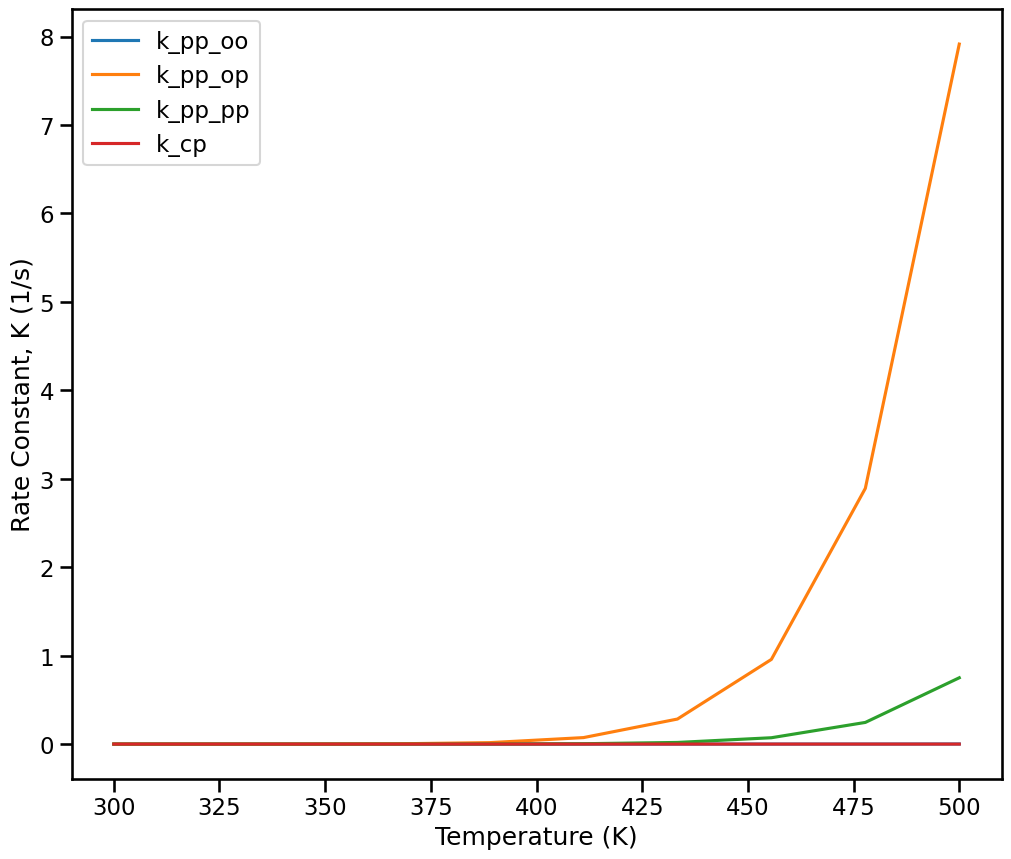

In [16]:
# Wrapping up the calculation of the rate constants into a function 
# using the interactive slider to change the temperature and see the effect on the rate constants

@interact(Temp=widgets.IntSlider(min=350, max=500, step=10, value=373))
def calculate_rate_constants(Temp):
    # Constants
    Ea = [128e3, 90e3, 100e3, 142e3] # Activation Energy, J/mol
    A = [2.34e10, 2.0e10, 2.1e10, 1.8e10] # Pre-exponential Factor (1/s)
    R = 8.314 # Universal Gas Constant, J/mol.k

    # Assign the values in the Ea list to identifiable variable names
    # were pp = phenol-phenol and cp = coal-phenol
    # were pp_oo = phenol-phenol_ortho-ortho, pp_op = phenol-phenol_ortho-para, pp_pp = phenol-phenol_para-para
    Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp = Ea  # Activation Energy for each reaction type
    A_pp_oo, A_pp_op, A_pp_pp, A_cp = A # Pre-exponential Factor for each reaction type

    # Calculating the rate constants for each reaction type
    k_pp_oo = A_pp_oo * np.exp(-Ea_pp_oo/(R*Temp))
    k_pp_op = A_pp_op * np.exp(-Ea_pp_op/(R*Temp))
    k_pp_pp = A_pp_pp * np.exp(-Ea_pp_pp/(R*Temp))
    k_cp = A_cp * np.exp(-Ea_cp/(R*Temp))

    return k_pp_oo, k_pp_op, k_pp_pp, k_cp

# Example usage
Temp = np.linspace(300, 500, 10) # Temperature, K
k_pp_oo, k_pp_op, k_pp_pp, k_cp = calculate_rate_constants(Temp)
# print(k_pp_oo, k_pp_op, k_pp_pp, k_cp)
print('k_pp_oo =', k_pp_oo, 'k_pp_op =', k_pp_op, 'k_pp_pp =', k_pp_pp, 'k_cp =', k_cp)

plt.plot(Temp, k_pp_oo, label='k_pp_oo')
plt.plot(Temp, k_pp_op, label='k_pp_op')
plt.plot(Temp, k_pp_pp, label='k_pp_pp')
plt.plot(Temp, k_cp, label='k_cp')
plt.xlabel('Temperature (K)')
plt.ylabel('Rate Constant, K (1/s)')
plt.legend()


## This section below summarizes all the functions defined in the codes above and 
## used for the simulation model

In [29]:
## Defining the model

## Identifying the inputs: 
    ## Temperature (T), preexponential factor (A), activation energy (Ea), time, t, number of phenol and coal molecules

## Defining the ranges: 
T = [300, 400, 500, 600, 700, 800, 900, 1000] # Kelvin
A = [1e-10, 1e-9, 1e-8, 1e-7] # 1/s
Ea_pp_o = [90] # kJ/mol

In [17]:
def Hrxn_pp(n_molphen):
    Na = 6.022e23 # Avogadro's number
    Hrxn_total_100p = 31620 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
    Hrxn_pp = Hrxn_total_100p/Na # J/ph_mol
    n_phenol = n_molphen * Na
    return Hrxn_pp * n_phenol      # Hrxn_pp - J

In [18]:

def Hrxn_pc(n_molcoal):
    Na = 6.022e23 # Avogadro's number
    Hrxn_total_60p = 23406 # Total Heat of reaction (60% phenolic-coal mix) J/mol (from DSC)
    Hrxn_pc = Hrxn_total_60p/Na # J/coal_mol
    n_coal = n_molcoal * Na
    return Hrxn_pc * n_coal

In [19]:
def calculate_rate_constants(Temp):
    # Constants
    Ea = [128e3, 90e3, 100e3, 142e3] # Activation Energy, J/mol
    A = [2.34e10, 2.0e10, 2.1e10, 1.8e10] # Pre-exponential Factor (1/s)
    R = 8.314 # Universal Gas Constant, J/mol.k

    # Assign the values in the Ea list to identifiable variable names
    # were pp = phenol-phenol and cp = coal-phenol
    # were pp_oo = phenol-phenol_ortho-ortho, pp_op = phenol-phenol_ortho-para, pp_pp = phenol-phenol_para-para
    Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp = Ea  # Activation Energy for each reaction type
    A_pp_oo, A_pp_op, A_pp_pp, A_cp = A # Pre-exponential Factor for each reaction type

    # Calculating the rate constants for each reaction type
    k_pp_oo = A_pp_oo * np.exp(-Ea_pp_oo/(R*Temp))
    k_pp_op = A_pp_op * np.exp(-Ea_pp_op/(R*Temp))
    k_pp_pp = A_pp_pp * np.exp(-Ea_pp_pp/(R*Temp))
    k_cp = A_cp * np.exp(-Ea_cp/(R*Temp))

    return k_pp_oo, k_pp_op, k_pp_pp, k_cp

In [20]:
Ea_pp = (Ea_pp_oo + Ea_pp_op + Ea_pp_pp)/3
A_pp = (A_pp_oo + A_pp_op + A_pp_pp)/3
print(Ea_pp, A_pp, Ea_cp, A_cp)

106000.0 21466666666.666668 142000.0 18000000000.0


In [21]:
def calculate_kpp(Temp):
    # Constants
    Ea_pp = 106000 # Activation Energy_phenol-phenol rxn, J/mol 
    A_pp = 21466666666.666668  # Pre-exponential Factor_phenol-phenol rxn (1/s)
    R = 8.314 # Universal Gas Constant, J/mol.k
    kpp = A_pp * np.exp(-Ea_pp/(R*Temp))
    return kpp 

def calculate_kpc(Temp):
    # Constants
    Ea_pc = 142000 # Activation Energy_coal-phenol rxn, J/mol 
    A_pc = 18000000000  # Pre-exponential Factor_coal-phenol rxn (1/s)
    R = 8.314 # Universal Gas Constant, J/mol.k
    kpc = A_pc * np.exp(-Ea_pc/(R*Temp))
    return kpc 

calculate_kpp(300)
calculate_kpc(300)

3.388310970747927e-15